<span style="color:black; font-size:30px">Weather Visualization</span>

<span style="color:black; font-size:20px">Import Libraies</span>

<span style="color:black; font-size:12px">This project uses the Visual Crossing Weather API</span>

<span style="color:black; font-size:10px">https://www.visualcrossing.com/</span>

In [89]:
import requests
import matplotlib.pyplot as plt
import json
import csv
import os
import pandas as pd

<span style="color:black; font-size:20px">Calling the API</span>

<span style="color:black; font-size:15px">Enter the location and the state (For Example: Dallas, TX).</span>

<span style="color:black; font-size:15px">Enter the start and end date for the respective weather data for the day</span>

<span style="color:black; font-size:15px">Use the format YYYY-MM-DD. Be sure to include the hyphen (For Example: 2024-09-22).</span>

In [90]:
token = "Q4LEY2GWSPRKGJG9ANUK39ER2"

location = str(input("Enter location: "))
startDate = str(input("Enter start date (YYYY-MM-DD): "))
endDate = str(input("Enter end date (YYYY-MM-DD): "))

endpoint = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/{startDate}/{endDate}?key={token}"

headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}

try:
    response = requests.get(endpoint, headers = headers)
    
    if response.status_code == 200:
        data = response.json() #data retrieved from the api will be stored here
        print("Successfully retrieved the data")
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        print("Response content:", response.text)

except requests.RequestException as e:
    print(f"An error occurred: {e}")

Enter location: Arlington, TX
Enter start date (YYYY-MM-DD): 2024-09-10
Enter end date (YYYY-MM-DD): 2024-09-11
Successfully retrieved the data


<span style="color:black; font-size:20px">Export the data to a CSV file</span>

In [91]:
hourly = data["days"][0]["hours"] #list with dictionaries inside
headers = hourly[0].keys()
folder = "dataHourlyCSV"

if not os.path.exists(folder):
    os.makedirs(folder)

csvFilename = os.path.join(folder, f"{startDate}_to_{endDate}.csv")

with open(csvFilename, 'w', newline = '') as file:
    writer = csv.DictWriter(file, fieldnames = headers)
    writer.writeheader()
    writer.writerows(hourly)

<span style="color:black; font-size:20px">Clean the Data</span>

<span style="color:black; font-size:15px">DO NOT RUN if you want all the data.This project aims to correlate weather patterns with solar panel electricity generation.</span>

In [93]:
cleanedData = pd.read_csv(csvFilename)
cleanedData = cleanedData.drop(columns = ["datetimeEpoch" , "temp" , "feelslike" , "humidity" , "dew" , "precip" , "precipprob" , "snow" , "snowdepth" , "preciptype" , "windgust" , "windspeed" , "winddir" , "pressure" , "visibility" , "severerisk" , "conditions" , "icon" , "stations" , "source"])
cleanedData.columns = ['Time (24 Hrs)' , 'Cloud Cover (%)' , 'Solar Irradiance (W/m2)' , 'Solar Energy (MJ/m2)' , 'UV Index']

cleanedData.to_csv(csvFilename , index = False)

<span style="color:black; font-size:20px">Visualize the Data</span>

In [110]:
plottingData = pd.read_csv(csvFilename)
time_x = plottingData['Time (24 Hrs)']

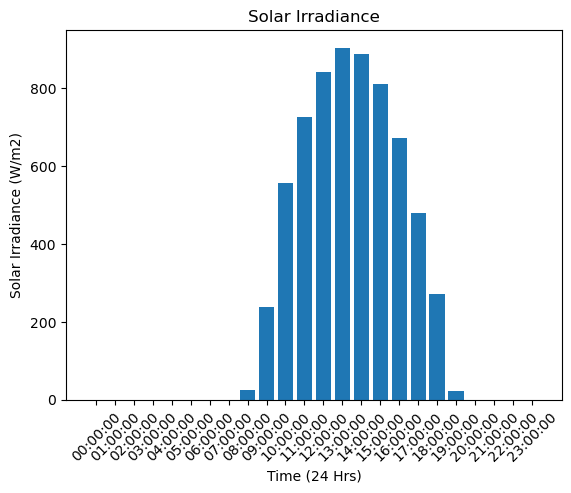

In [113]:
solarIrradiance_y = plottingData['Solar Irradiance (W/m2)']

plt.bar(time_x , solarIrradiance_y)
plt.xticks(rotation = 45)
plt.title('Solar Irradiance')
plt.xlabel('Time (24 Hrs)')
plt.ylabel('Solar Irradiance (W/m2)')
plt.show()

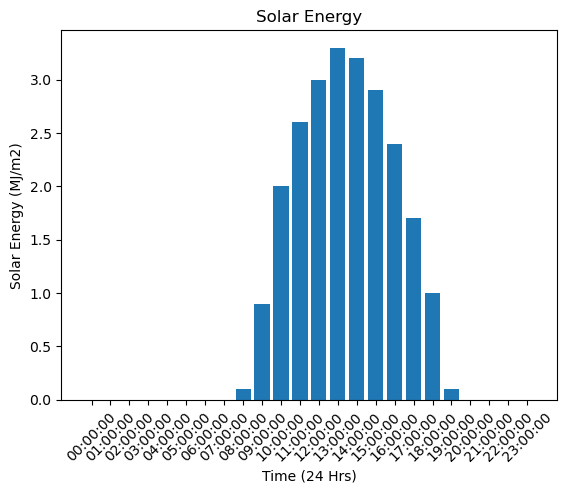

In [115]:
solarEnergy_y = plottingData['Solar Energy (MJ/m2)']

plt.bar(time_x , solarEnergy_y)
plt.xticks(rotation = 45)
plt.title('Solar Energy')
plt.xlabel('Time (24 Hrs)')
plt.ylabel('Solar Energy (MJ/m2)')
plt.show()

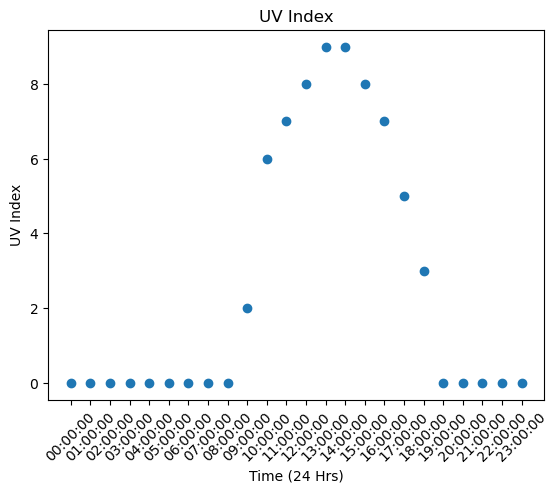

In [116]:
uvIndex_y = plottingData['UV Index']

plt.scatter(time_x , uvIndex_y)
plt.xticks(rotation = 45)
plt.title('UV Index')
plt.xlabel('Time (24 Hrs)')
plt.ylabel('UV Index')
plt.show()

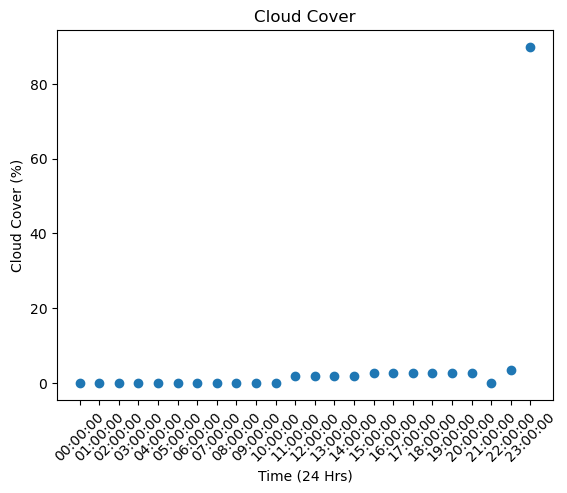

In [117]:
cloudCover_y = plottingData['Cloud Cover (%)']

plt.scatter(time_x , cloudCover_y)
plt.xticks(rotation = 45)
plt.title('Cloud Cover')
plt.xlabel('Time (24 Hrs)')
plt.ylabel('Cloud Cover (%)')
plt.show()